In [162]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [163]:
# files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [164]:
# read the city data file and store it in a pandas DataFrame
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [165]:
# read the ride data file and store it in a pandas DataFrome
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12
5,South Latoya,3/11/2019 12:26,9.52,1.995000e+12
6,New Paulville,2/27/2019 11:17,43.25,7.932080e+11
7,Simpsonburgh,4/26/2019 0:43,35.98,1.119540e+11
8,South Karenland,1/8/2019 3:28,35.09,7.995620e+12
9,North Jasmine,3/9/2019 6:26,42.81,5.327640e+12


In [166]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [167]:
total_rides_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides_type.head()

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [168]:
total_drivers_type = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers_type.head()

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [169]:
total_fares_type = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares_type.head()

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [170]:
average_fare_ride = total_fares_type / total_rides_type

In [171]:
average_fare_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [172]:
average_fare_driver = total_fares_type / total_drivers_type

In [173]:
average_fare_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [174]:
pyber_summary_df = pd.DataFrame({"Total Rides":total_rides_type, "Total Driver":total_drivers_type, "Total Fares":total_fares_type, "Average Fare per Ride":average_fare_ride, "Average Fare per Driver":average_fare_driver})
pyber_summary_df

,Total Rides,Total Driver,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [175]:
pyber_summary_df.index.name = None

In [176]:
pyber_summary_df

,Total Rides,Total Driver,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [177]:
pyber_data_df.rename(columns = {'city':'City', 'date':'Date','fare':'Fare', 'ride_id': 'Ride Id','driver_count': 'No. Drivers', 'type':'City Type'}, inplace = True)
pyber_data_df

,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,4/29/2019 17:04,13.38,8.550370e+12,6,Rural
2371,Lake Latoyabury,1/30/2019 0:05,20.76,9.018730e+12,2,Rural
2372,North Jaime,2/10/2019 21:03,11.11,2.781340e+12,1,Rural
2373,West Heather,5/7/2019 19:22,44.94,4.256850e+12,4,Rural


In [178]:
pyber_data_df.set_index('Date')

,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
1/14/2019 10:14,Lake Jonathanshire,13.83,5.739410e+12,5,Urban
3/4/2019 18:24,South Michelleport,30.24,2.343910e+12,72,Urban
2/24/2019 4:29,Port Samanthamouth,33.44,2.005070e+12,57,Urban
2/10/2019 23:22,Rodneyfort,23.44,5.149250e+12,34,Urban
3/6/2019 4:28,South Jack,34.58,3.908450e+12,46,Urban
...,...,...,...,...,...
4/29/2019 17:04,Michaelberg,13.38,8.550370e+12,6,Rural
1/30/2019 0:05,Lake Latoyabury,20.76,9.018730e+12,2,Rural
2/10/2019 21:03,North Jaime,11.11,2.781340e+12,1,Rural


In [179]:
selected_columns = pyber_data_df[['Date', 'City Type', 'Fare']].copy()

In [180]:
selected_columns

,Date,City Type,Fare
0,1/14/2019 10:14,Urban,13.83
1,3/4/2019 18:24,Urban,30.24
2,2/24/2019 4:29,Urban,33.44
3,2/10/2019 23:22,Urban,23.44
4,3/6/2019 4:28,Urban,34.58
...,...,...,...
2370,4/29/2019 17:04,Rural,13.38
2371,1/30/2019 0:05,Rural,20.76
2372,2/10/2019 21:03,Rural,11.11
2373,5/7/2019 19:22,Rural,44.94


In [181]:
selected_columns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 0 to 2374
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2375 non-null   object 
 1   City Type  2375 non-null   object 
 2   Fare       2375 non-null   float64
dtypes: float64(1), object(2)
memory usage: 74.2+ KB


In [182]:
selected_columns["Date"] = pd.to_datetime(selected_columns["Date"])

In [183]:
selected_columns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 0 to 2374
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2375 non-null   datetime64[ns]
 1   City Type  2375 non-null   object        
 2   Fare       2375 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 74.2+ KB


In [184]:
sum_of_fares = selected_columns.groupby(["Date", "City Type"]).sum()["Fare"]
sum_of_fares.head()

Date                 City Type
2019-01-01 00:08:00  Urban        37.91
2019-01-01 00:46:00  Suburban     47.74
2019-01-01 02:07:00  Suburban     24.07
2019-01-01 03:46:00  Urban         7.57
2019-01-01 05:23:00  Urban        10.75
Name: Fare, dtype: float64

In [185]:
sum_of_fares = pd.DataFrame(sum_of_fares)
sum_of_fares

,,Fare
Date,City Type,
2019-01-01 00:08:00,Urban,37.91
2019-01-01 00:46:00,Suburban,47.74
2019-01-01 02:07:00,Suburban,24.07
2019-01-01 03:46:00,Urban,7.57
2019-01-01 05:23:00,Urban,10.75
...,...,...
2019-05-08 04:20:00,Urban,21.99
2019-05-08 04:39:00,Urban,18.45
2019-05-08 07:29:00,Urban,18.55


In [186]:
sum_of_fares = sum_of_fares.reset_index()

In [187]:
sum_of_fares

,Date,City Type,Fare
0,2019-01-01 00:08:00,Urban,37.91
1,2019-01-01 00:46:00,Suburban,47.74
2,2019-01-01 02:07:00,Suburban,24.07
3,2019-01-01 03:46:00,Urban,7.57
4,2019-01-01 05:23:00,Urban,10.75
...,...,...,...
2359,2019-05-08 04:20:00,Urban,21.99
2360,2019-05-08 04:39:00,Urban,18.45
2361,2019-05-08 07:29:00,Urban,18.55
2362,2019-05-08 11:38:00,Urban,19.77


In [188]:
sum_of_fares_pivot = sum_of_fares.pivot(index="Date", columns="City Type")

In [189]:
sum_of_fares_pivot

Fare                
City Type           Rural Suburban  Urban
Date                                     
2019-01-01 00:08:00   NaN      NaN  37.91
2019-01-01 00:46:00   NaN    47.74    NaN
2019-01-01 02:07:00   NaN    24.07    NaN
2019-01-01 03:46:00   NaN      NaN   7.57
2019-01-01 05:23:00   NaN      NaN  10.75
...                   ...      ...    ...
2019-05-08 04:20:00   NaN      NaN  21.99
2019-05-08 04:39:00   NaN      NaN  18.45
2019-05-08 07:29:00   NaN      NaN  18.55
2019-05-08 11:38:00   NaN      NaN  19.77
2019-05-08 13:10:00   NaN      NaN  18.04

[2361 rows x 3 columns]

In [190]:
sum_of_fares_df = sum_of_fares_pivot.loc['01/01/2019':'04/28/2019']

In [191]:
sum_of_fares_df

Fare                
City Type           Rural Suburban  Urban
Date                                     
2019-01-01 00:08:00   NaN      NaN  37.91
2019-01-01 00:46:00   NaN    47.74    NaN
2019-01-01 02:07:00   NaN    24.07    NaN
2019-01-01 03:46:00   NaN      NaN   7.57
2019-01-01 05:23:00   NaN      NaN  10.75
...                   ...      ...    ...
2019-04-28 14:28:00   NaN      NaN  11.46
2019-04-28 16:29:00   NaN      NaN  36.42
2019-04-28 17:26:00   NaN      NaN  31.43
2019-04-28 17:38:00   NaN    34.87    NaN
2019-04-28 19:35:00   NaN    16.96    NaN

[2182 rows x 3 columns]

In [192]:
sum_of_fares_df = sum_of_fares_df.resample('W').sum()

In [193]:
sum_of_fares_df

Fare                  
City Type    Rural Suburban    Urban
Date                                
2019-01-06  187.92   721.60  1661.68
2019-01-13   67.65  1105.13  2050.43
2019-01-20  306.00  1218.20  1939.02
2019-01-27  179.69  1203.28  2129.51
2019-02-03  333.08  1042.79  2086.94
2019-02-10  115.80   974.34  2162.64
2019-02-17   95.82  1045.50  2235.07
2019-02-24  419.06  1412.74  2466.29
2019-03-03  175.14   858.46  2218.20
2019-03-10  303.94   925.27  2470.93
2019-03-17  163.39   906.20  2044.42
2019-03-24  189.76  1122.20  2368.37
2019-03-31  199.42  1045.06  1942.77
2019-04-07  501.24  1010.73  2356.70
2019-04-14  269.79   784.82  2390.72
2019-04-21  214.14  1149.27  2303.80
2019-04-28  191.85  1357.75  2238.29

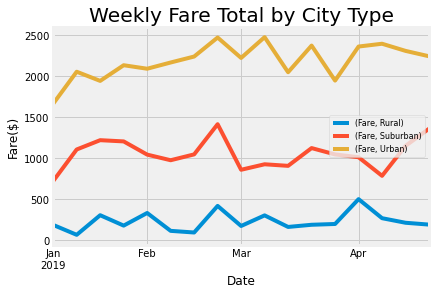

In [194]:
sum_of_fares_df.plot.line()
plt.style.use('fivethirtyeight')
plt.title("Weekly Fare Total by City Type")
x = np.linspace(0, 40)
plt.xlabel("Date")
plt.ylabel("Fare($)")
plt.legend(loc=7, prop={'size':8})
plt.show()
